##Exercise Interpolation

In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

In [15]:
x = [2,3,4,5]
plt.plot(2,3,'o', ms ='5',color='black') 
plt.plot(3,1,'o', ms ='5',color='black') 
plt.plot(4,2,'o', ms ='5',color='black') 
plt.plot(5,2,'o', ms ='5',color='black') 
plt.grid()

2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

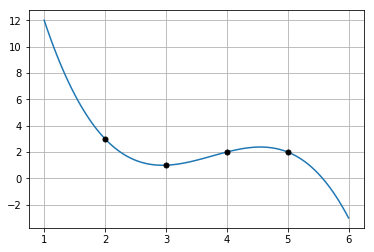

In [21]:
def w1(x):
    return ((x-3)*(x-4)*(x-5))/((2-3)*(2-4)*(2-5))
def w2(x):
    return ((x-2)*(x-4)*(x-5))/((3-2)*(3-4)*(3-5))
def w3(x):
    return ((x-2)*(x-3)*(x-5))/((4-2)*(4-3)*(4-5))
def w4(x):
    return ((x-2)*(x-3)*(x-4))/((5-2)*(5-3)*(5-4))
def f(x):
    return 3*w1(x)+1*w2(x)+2*w3(x)+2*w4(x)

xs = np.linspace(1,6,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.plot(2,3,'o', ms ='5',color='black') 
plt.plot(3,1,'o', ms ='5',color='black') 
plt.plot(4,2,'o', ms ='5',color='black') 
plt.plot(5,2,'o', ms ='5',color='black') 
plt.grid()

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

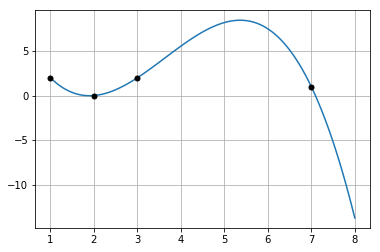

In [23]:
def w1(x):
    return ((x-2)*(x-3)*(x-7))/((1-2)*(1-3)*(1-7))
def w2(x):
    return ((x-1)*(x-3)*(x-7))/((2-1)*(2-3)*(2-7))
def w3(x):
    return ((x-1)*(x-2)*(x-7))/((3-1)*(3-2)*(3-7))
def w4(x):
    return ((x-1)*(x-2)*(x-3))/((7-1)*(7-2)*(7-3))
def f(x):
    return 2*w1(x)+0*w2(x)+2*w3(x)+1*w4(x)

xs = np.linspace(1,8,100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.plot(1,2,'o', ms ='5',color='black') 
plt.plot(2,0,'o', ms ='5',color='black') 
plt.plot(3,2,'o', ms ='5',color='black') 
plt.plot(7,1,'o', ms ='5',color='black') 
plt.grid()

4) Write a function `ledendre(x, xs, ys)` which compute the legendre polynomial given the list of x values in xs and y values in ys.

`legendre(1.5, [1,2,3,7], [2,0,2,1])`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

In [ ]:
def legendre(x, xs, ys):
    #fill in  
    degree = len(xs)
    for i in degree:
        for j in ys:
            if()
    return  

In [38]:
ps=[1,2,3,4,5]
qs=[8,7,6,5,4]

for p,q in zip(ps,qs):
    print (p,q)

for i, (p,q) in enumerate(zip(ps,qs)):
    print (i,p,q)

1 8
2 7
3 6
4 5
5 4
0 1 8
1 2 7
2 3 6
3 4 5
4 5 4


In [5]:
def legendre_generator(xs,ys):
    nterms = len(xs)
    def legendre(x):
        s= 0;
        for ix in range(nterms):
            numerator = ys[ix]
            for inum in range(nterms):
                if inum != ix:
                    numerator *= (x - xs[inum])/(xs[ix] - xs[inum])
            s += numerator
        return s     
    return legendre
        

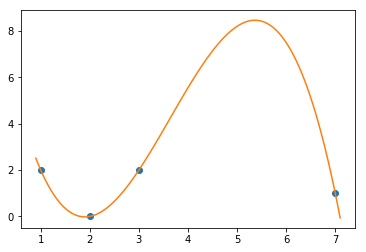

In [6]:
xs = [1,2,3,7]
ys = [2,0,2,1]

leg = legendre_generator(xs,ys)
plt.plot(xs,ys,'o')

linx = np.linspace(0.9,7.1,100)
liny = [leg(x) for x in linx]
plt.plot(linx,liny)

In [8]:
def add_n_generator(n):
    def ret(x):
        return x+n
    return ret 

In [9]:
f2 = add_n_generator(20)
f2(2)

22

In [10]:
f30 = add_n_generator(30)
f30(9)

39

In [11]:
add_n_generator(30)(9)

39

5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

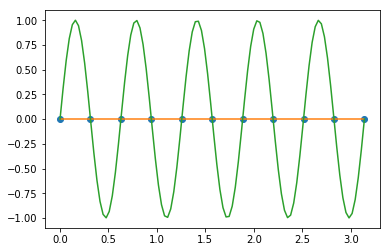

In [15]:
def f(x):
    return np.sin(10*x)

xs = np.linspace(0,math.pi,11)
ys = f(xs)
plt.plot(xs,ys,'o')

leg = legendre_generator(xs,ys)
linx = np.linspace(0, math.pi,100)
liny = [leg(x) for x in linx]
realsin = f(linx)

plt.plot(linx,liny)
plt.plot(linx,realsin)

6) Plot legendre polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your legendre is plotte with at least 100 points.

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Note the 200. Then plot legendre polynomial for these points.

8) Does it pass through all the point? Does it look like the original function.

##Exercise Integration

0) What is $$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

$$ \int \limits_{x=1}^{x=3} x^3 \; dx = \frac{x^4}{4}\big|_{x=1}^{x=3} = \frac{3^4}{4}-\frac{1^3}{4}$$

1)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 1 piece.

In [89]:
def trapez(f,a,b,n):
    edges = np.linspace(a, b, n+1)
    h = (b-a)/n
    return (sum(f(e) for e in edges[1:-1]) + 0.5*(f(a)+f(b)))*h

def f(x):
    return x**3
ans = trapez(lambda x: f(x),1,3,100)
print(ans)

20.0008


In [86]:
e = 1/12*2**3/100**2*18

In [88]:
print (ans-e, ans+e )

19.9996 20.002


2)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 100 pieces.

3) What is the bound on error for 1)?

4) What is the bound on error for 2)?

5) Compute the following integral
$$ \int \limits_{x=0}^{x=1} e^{-x} \sin(x^2) \; dx $$

using 100 sub divisions. This is one of those thing you can't do by hands. 

In [102]:
def f(x):
    return math.exp(-x)*math.sin(x**2)
ans = trapez(lambda x: f(x),0,1,100)
print(ans)

0.15091330026867264


In [100]:
error = (1/12*2**3/100**2)*(math.exp(0)*((-4)*0**2*math.sin(0**2) - 2*0*math.cos(0)+2*math.cos(0**2)) - math.exp(-0)*(2*0*math.cos(0**2)-math.sin(0**2)))
print(error)
print (ans-error, ans+error)

0.0001333333333333333
0.1507799669353393 0.151046633602006


6) If we want compute
$$ \int \limits_{x=0}^{x=1} e^{-x} \; dx $$
that is at most $10^{-6}$ away from the real answer. How many subdivisions do we need?

In [ ]:
f()

7) Compute the integral above and make sure your answer is at most $10^-6$ away from the real answer. 